# Logistic Model

Load in data

In [1]:
import pandas as pd
%config InlineBackend.figure_formats = ['svg']

In [2]:
df_train = pd.read_pickle("training_data_final_v3.pkl")
df_train.head()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
0,116,14.0,255.929993,3839.489990,17.01,-65.700002,-412.400017,0.8,-0.2,1.3,...,False,5125.041181,5125.041181,False,False,3848.730157,True,3848.755458,True,1.0
1,117,14.0,255.929993,3839.489990,17.01,-65.700002,-412.400017,0.8,-0.2,1.3,...,False,5125.041181,5125.041181,False,False,3848.730157,True,3848.755458,True,1.0
2,118,14.0,253.520004,3827.120117,17.01,-487.900009,-2336.399994,0.0,-0.3,1.1,...,False,5125.041181,5125.041181,False,False,3835.681692,True,3836.255442,True,1.0
3,119,14.0,253.520004,3827.120117,17.01,-487.900009,-2336.399994,0.0,-0.3,1.1,...,False,5125.041181,5125.041181,False,False,3835.681692,True,3836.255442,True,1.0
4,120,14.0,248.229996,3799.129883,17.01,-665.999985,-4195.700073,-0.3,-0.8,-4.3,...,False,5125.041181,5125.041181,False,False,3806.720581,True,3807.983854,True,1.0


Because logistic models do not have a built in parameter for evaluation, we can append the testing dataset to the training dataset. 

In [3]:
df_test = pd.read_pickle("testing_data_final_v3.pkl")
df_test.tail()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
176190,12519,8.0,1160.579956,-4722.250000,17.010000,-2548.399963,-21971.201172,2.300000,0.100000,-0.300000,...,True,10142.190268,286.833468,False,False,-2059.354519,False,1061.406849,True,1.0
176191,12520,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10208.745254,254.911089,False,False,-2201.662082,False,1029.958910,True,1.0
176192,12521,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10275.355398,242.710862,False,False,-2257.583911,False,1074.000408,True,1.0
176193,12522,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1109.036168,True,1.0
176194,12523,8.0,1061.819946,-5045.839844,33.630001,-7788.099976,-10883.800049,4935.100098,-5320.599976,-1349.600067,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1016.637251,True,1.0


In [4]:
df_train = df_train.append(df_test)
df_train.reset_index(drop = True, inplace = True)
df_train.tail()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
633010,12519,8.0,1160.579956,-4722.250000,17.010000,-2548.399963,-21971.201172,2.300000,0.100000,-0.300000,...,True,10142.190268,286.833468,False,False,-2059.354519,False,1061.406849,True,1.0
633011,12520,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10208.745254,254.911089,False,False,-2201.662082,False,1029.958910,True,1.0
633012,12521,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10275.355398,242.710862,False,False,-2257.583911,False,1074.000408,True,1.0
633013,12522,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1109.036168,True,1.0
633014,12523,8.0,1061.819946,-5045.839844,33.630001,-7788.099976,-10883.800049,4935.100098,-5320.599976,-1349.600067,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1016.637251,True,1.0


### Model Building

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Accounting for multicolinearity, these are the features that will be used to create the logistic model. 

- **Blue Team**
    - blue_ping
    - blue_pos_z
    - blue_vel_x
    - blue_vel_y
    - blue_vel_z
    - blue_ang_vel_x
    - blue_ang_vel_y
    - blue_ang_vel_z
    - blue_rot_x
    - blue_rot_y
    - blue_rot_z
    - blue_dodge_active
    - blue_boost
    - blue_possesion
    - blue_dist_to_ball
    - blue_behind_ball
    - blue_dead

- **Orange Team**
    - orange_ping
    - orange_pos_z
    - orange_vel_x
    - orange_vel_y
    - orange_vel_z
    - orange_ang_vel_x
    - orange_ang_vel_y
    - orange_ang_vel_z
    - orange_rot_x
    - orange_rot_y
    - orange_rot_z
    - orange_dodge_active
    - orange_boost
    - orange_dist_to_ball
    - orange_behind_ball
    - orange_dead

- **Ball**
    - ball_pos_x
    - ball_pos_z
    - ball_vel_x
    - ball_vel_y
    - ball_vel_z
    - ball_ang_vel_x
    - ball_ang_vel_y
    - ball_ang_vel_z
    - ball_dist_to_blue_goal

In [6]:
myformula = (
    "game_next_goal ~ blue_ping "
    "+ ball_pos_x "
    "+ ball_dist_to_blue_goal "
    "+ blue_dodge_active "
    "+ orange_dodge_active "
    "+ blue_possesion "
    "+ blue_pos_z + orange_pos_z + ball_pos_z "
    "+ blue_vel_x + blue_vel_y + blue_vel_z "
    "+ blue_ang_vel_x + blue_ang_vel_y + blue_ang_vel_z "
    "+ blue_rot_x + blue_rot_y + blue_rot_z "
    "+ blue_boost + blue_dead "
    "+ blue_dist_to_ball + blue_behind_ball "
    "+ orange_ping "
    "+ orange_vel_x + orange_vel_y + orange_vel_z "
    "+ orange_ang_vel_x + orange_ang_vel_y + orange_ang_vel_z "
    "+ orange_rot_x + orange_rot_y + orange_rot_z "
    "+ orange_boost + orange_dead "
    "+ orange_dist_to_ball + orange_behind_ball "
    "+ ball_vel_x + ball_vel_y + ball_vel_z "
    "+ ball_ang_vel_x + ball_ang_vel_y + ball_ang_vel_z"
)
myformula

'game_next_goal ~ blue_ping + ball_pos_x + ball_dist_to_blue_goal + blue_dodge_active + orange_dodge_active + blue_possesion + blue_pos_z + orange_pos_z + ball_pos_z + blue_vel_x + blue_vel_y + blue_vel_z + blue_ang_vel_x + blue_ang_vel_y + blue_ang_vel_z + blue_rot_x + blue_rot_y + blue_rot_z + blue_boost + blue_dead + blue_dist_to_ball + blue_behind_ball + orange_ping + orange_vel_x + orange_vel_y + orange_vel_z + orange_ang_vel_x + orange_ang_vel_y + orange_ang_vel_z + orange_rot_x + orange_rot_y + orange_rot_z + orange_boost + orange_dead + orange_dist_to_ball + orange_behind_ball + ball_vel_x + ball_vel_y + ball_vel_z + ball_ang_vel_x + ball_ang_vel_y + ball_ang_vel_z'

In [7]:
mymod = smf.glm(formula = myformula, data = df_train,
                     family = sm.families.Binomial())

In [8]:
myfit = mymod.fit()

In [9]:
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         game_next_goal   No. Observations:               633015
Model:                            GLM   Df Residuals:                   632972
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.1981e+05
Date:                Mon, 04 Apr 2022   Deviance:                   8.3962e+05
Time:                        20:34:17   Pearson chi2:                 6.32e+05
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05812
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.1426      0.021      6.857      0.000       0.102       0.183
blue_dodge_active[T.True]      -0.1303      0.022     -5.801      0.000      -0.174      -0.086
orange_dodge_active[T.True]     0.2796      0.021     13.397      0.000       0.239       0.320
blue_possesion[T.True]         -0.3828      0.006    -59.450      0.000      -0.395      -0.370
blue_dead[T.True]               0.9096      0.037     24.817      0.000       0.838       0.981
blue_behind_ball[T.True]       -0.2855      0.010    -29.646      0.000      -0.304      -0.267
orange_dead[T.True]            -0.7932      0.035    -22.402      0.000      -0.863      -0.724
orange_behind_ball[T.True]      0.2276      0.010     23.823      0.000       0.209       0.246
blue_ping                       0.0008      0.000      1.824      0.068   -6.13e-05       0.002
ball_pos_x                   2.206e-05   1.23e-06     17.997      0.000    1.97e-05    2.45e-05
ball_dist_to_blue_goal       -5.42e-05   1.09e-06    -49.870      0.000   -5.63e-05   -5.21e-05
blue_pos_z                      0.0001   1.21e-05      9.945      0.000    9.68e-05       0.000
orange_pos_z                -6.727e-05   1.25e-05     -5.380      0.000   -9.18e-05   -4.28e-05
ball_pos_z                   3.009e-05   7.96e-06      3.779      0.000    1.45e-05    4.57e-05
blue_vel_x                  -1.377e-07   3.46e-07     -0.398      0.691   -8.16e-07    5.41e-07
blue_vel_y                  -2.449e-06   3.48e-07     -7.044      0.000   -3.13e-06   -1.77e-06
blue_vel_z                   -2.16e-06   1.06e-06     -2.038      0.042   -4.24e-06   -8.31e-08
blue_ang_vel_x               1.492e-05   1.45e-06     10.286      0.000    1.21e-05    1.78e-05
blue_ang_vel_y               1.039e-06   1.26e-06      0.827      0.408   -1.42e-06     3.5e-06
blue_ang_vel_z              -3.788e-06   1.62e-06     -2.339      0.019   -6.96e-06   -6.14e-07
blue_rot_x                      0.0289      0.008      3.435      0.001       0.012       0.045
blue_rot_y                      0.0165      0.002      8.340      0.000       0.013       0.020
blue_rot_z                     -0.0015      0.002     -0.618      0.536      -0.006       0.003
blue_boost                     -0.0013   3.15e-05    -41.825      0.000      -0.001      -0.001
blue_dist_to_ball            1.606e-05   2.34e-06      6.853      0.000    1.15e-05    2.06e-05
orange_ping                     0.0169      0.000     40.277      0.000       0.016       0.018
orange_vel_x                -1.348e-06   3.44e-07     -3.919      0.000   -2.02e-06   -6.74e-07
orange_vel_y                 1.075e-07   3.48e-07      0.309      0.757   -5.75e-07     7.9e-07
orange_vel_z                  5.99e-06   1.08e-06      5.567      0.000    3.88e-06     8.1e-06
orange_ang_

### Model Evaluation

Extract prediction calculations

<AxesSubplot:>

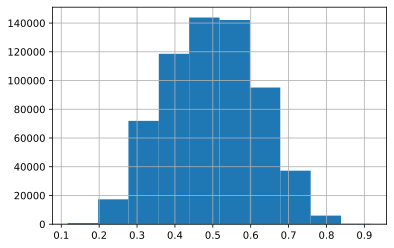

In [10]:
df_train["prediction_prob"] = myfit.predict(df_train)
df_train["prediction_prob"].hist()

In [11]:
df_train["prediction"] = None
df_train.loc[df_train["prediction_prob"] < 0.5, "prediction"] = 0
df_train.loc[df_train["prediction_prob"] >= 0.5, "prediction"] = 1
df_train["prediction"].describe()

count     633015
unique         2
top            1
freq      319001
Name: prediction, dtype: int64

Confusion matrix on data that was used to build the model

In [12]:
cm_train = pd.crosstab(df_train['game_next_goal'], df_train['prediction'],
                       rownames=['Actual'], colnames=['Predicted'])
cm_train

Predicted,0,1
Actual,,
0.0,187451,130968
1.0,126563,188033


Accuracy on training games

In [13]:
(cm_train.iloc[0, 0] + cm_train.iloc[1, 1])/(cm_train.values.sum())

0.593167618460858

Log loss on training games

In [14]:
from sklearn.metrics import log_loss

In [15]:
log_loss(df_train.loc[df_train["prediction_prob"].isnull() == False, "game_next_goal"], 
         df_train.loc[df_train["prediction_prob"].isnull() == False, "prediction_prob"])

0.6631897702793563

Load in dataset that contains 20 games that are unseen by the model

In [16]:
df_accuracy = pd.read_pickle("accuracy_data_final_v3.pkl")
df_accuracy.head()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
0,119,5.0,-2047.619995,2559.620117,17.01,304.099998,-304.099998,0.8,-0.4,-0.6,...,False,5125.041181,5125.041181,False,False,3278.740280,True,3278.740280,True,0.0
1,120,5.0,-2047.619995,2559.620117,17.01,304.099998,-304.099998,0.8,-0.4,-0.6,...,False,5125.041181,5125.041181,False,False,3278.740280,True,3278.740280,True,0.0
2,121,5.0,-2036.800049,2548.800049,17.01,1885.899963,-1885.899963,0.0,-0.3,-0.1,...,False,5125.041181,5125.041181,False,False,3263.536603,True,3263.536603,True,0.0
3,122,5.0,-2036.800049,2548.800049,17.01,1885.899963,-1885.899963,0.0,-0.3,-0.1,...,False,5125.041181,5125.041181,False,False,3263.536603,True,3263.536603,True,0.0
4,123,5.0,-2014.979980,2526.979980,17.01,3199.400024,-3199.400024,0.0,-0.2,0.0,...,False,5125.041181,5125.041181,False,False,3232.879085,True,3232.879085,True,0.0


Extract prediction calculations

<AxesSubplot:>

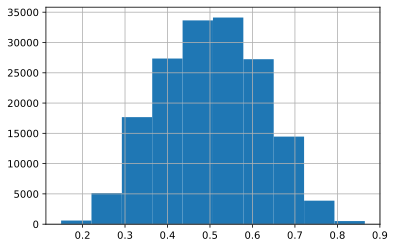

In [17]:
df_accuracy["prediction_prob"] = myfit.predict(df_accuracy)
df_accuracy["prediction_prob"].hist()

In [18]:
df_accuracy["prediction"] = None
df_accuracy.loc[df_accuracy["prediction_prob"] < 0.5, "prediction"] = 0
df_accuracy.loc[df_accuracy["prediction_prob"] >= 0.5, "prediction"] = 1
df_accuracy["prediction"].describe()

count     164639
unique         2
top            1
freq       83922
Name: prediction, dtype: int64

Confusion matrix on unseen games

In [19]:
cm_accuracy = pd.crosstab(df_accuracy['game_next_goal'], df_accuracy['prediction'],
                          rownames=['Actual'], colnames=['Predicted'])
cm_accuracy

Predicted,0,1
Actual,,
0.0,47808,37113
1.0,32909,46809


Prediction accuracy on unseen games

In [20]:
(cm_accuracy.iloc[0, 0] + cm_accuracy.iloc[1, 1])/(cm_accuracy.values.sum())

0.5746937238442896

Log loss on unseen games

In [21]:
log_loss(df_accuracy["game_next_goal"], df_accuracy["prediction_prob"])

0.6722601868004068

In [22]:
from sklearn.metrics import roc_curve, auc

AUC on unseen games

In [23]:
fpr, tpr, threshold = roc_curve(df_accuracy["game_next_goal"], df_accuracy["prediction"])

logistic_auc = auc(fpr, tpr)
logistic_auc

0.5750763038520266

Graph of ROC

In [24]:
import matplotlib.pyplot as plt

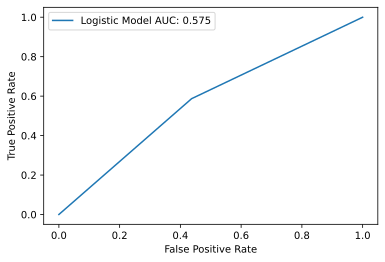

In [25]:
plt.plot(fpr, tpr, label = f"Logistic Model AUC: {logistic_auc:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Save model

In [26]:
import pickle

In [27]:
pickle.dump(myfit, open("logistic_model.model", "wb"))